# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mutual_info_score
from scipy.stats import contingency
import pandas as pd
from scipy.stats.distributions import chi2

## Task 1

### a)

#### bp 1)

In [6]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [4]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

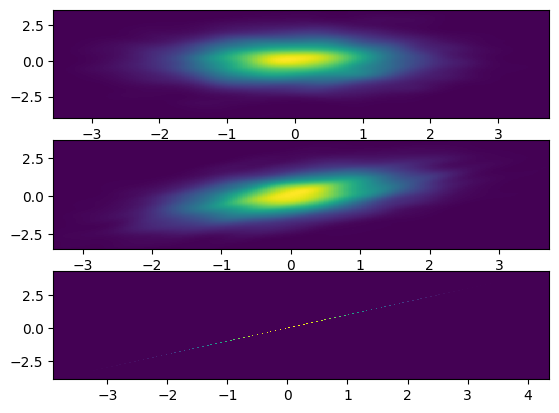

In [6]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [5]:
all_ro = np.zeros([6,100])
all_MI = np.zeros([6,100])
n = 1000
i=0
ro_list =  [0.01, 0.1, 0.25, 0.5, 0.75, 0.99]
for ro in ro_list:
    for k in range(100):
        ro_hat = np.zeros(100)
        MI_hat = np.zeros(100)
        data = np.random.multivariate_normal(np.zeros(2), np.array([[1, ro], [ro, 1]]), n)
        all_ro[i,k] = pearsonr(data[:,0], data[:,1])[0]
        discx = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
        discx.fit(data)
        X = discx.transform(data)
        all_MI[i,k] = mutual_info_score(X[:,0], X[:,1])
    i += 1

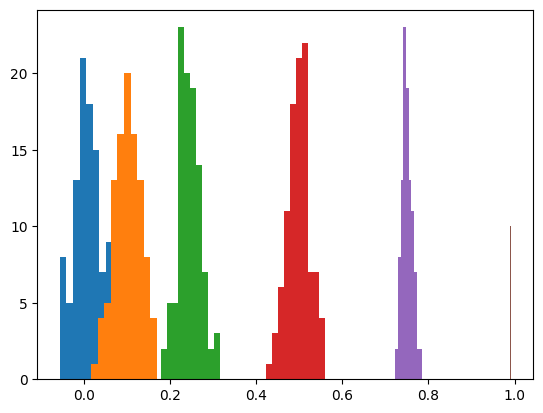

In [61]:
for i in range(6):
    plt.hist(all_ro[i,:])

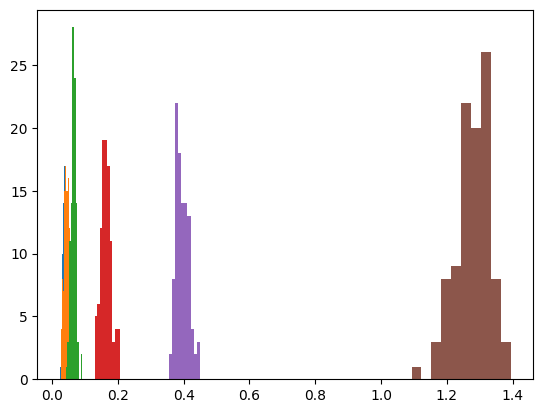

In [62]:
for i in range(6):
    plt.hist(all_MI[i,:])

In [10]:
# pearsonr - Pearson correlation
# use sklearn.metrics.mutual_info_score although it is not the best option 
#       (as it takes max over permutations of classes of r.v. instead of computing one value and returning it)

#### bp 3)

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [ ]:
# We use mean to get better estimate (from n = 100 samples from previous point)

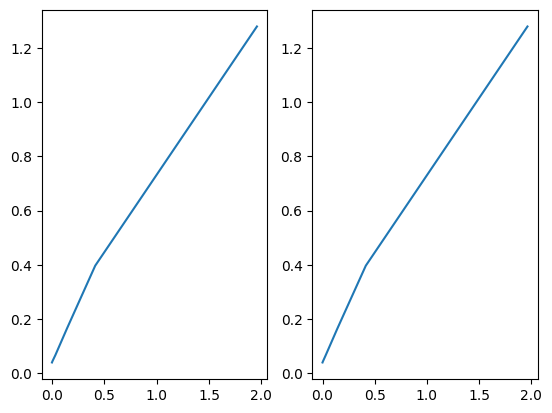

In [76]:
ros = (np.sum(all_ro, axis=1))
ro_transformed = [-np.log(1-ro**2)/2 for ro in ro_list]
ro_hat_transformed = [-np.log(1-ro**2)/2 for ro in np.mean(all_ro, axis=1)]
plt.subplot(1,2,1)
plt.plot(ro_transformed, np.mean(all_MI, axis=1))
plt.subplot(1,2,2)
plt.plot(ro_hat_transformed, np.mean(all_MI, axis=1))

In [ ]:
# results are pretty much the same since ro is very close to ro_hat

In [74]:
np.mean(all_MI, axis=1)

array([0.03859274, 0.04346829, 0.06557127, 0.16455088, 0.39643476,
       1.28052353])

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

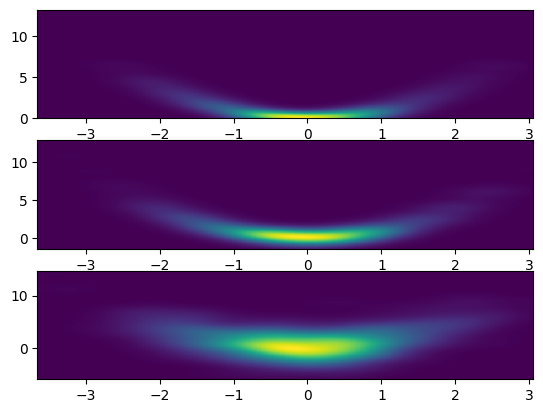

In [12]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

In [111]:
all_sigma2 = np.zeros([6,100])
n = 1000
i=0
sigma_list =  [0, 1/2, 1, 2, 5, 10]
for sigma2 in sigma_list:
    for k in range(100):
        ro_hat = np.zeros(100)
        MI_hat = np.zeros(100)
        x = np.random.normal(0, 1, n)
        data = np.array([x, x**2 + np.random.normal(0, sigma2, n)]).T
        all_ro[i,k] = pearsonr(data[:,0], data[:,1])[0]
        discx = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
        discx.fit(data)
        X = discx.transform(data)
        all_MI[i,k] = mutual_info_score(X[:,0], X[:,1])
    i += 1

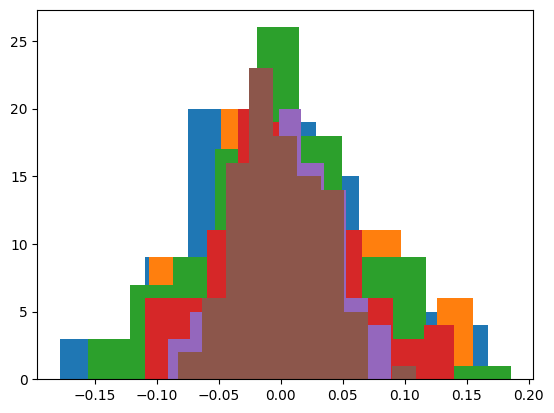

In [84]:
for i in range(6):
    plt.hist(all_ro[i,:])

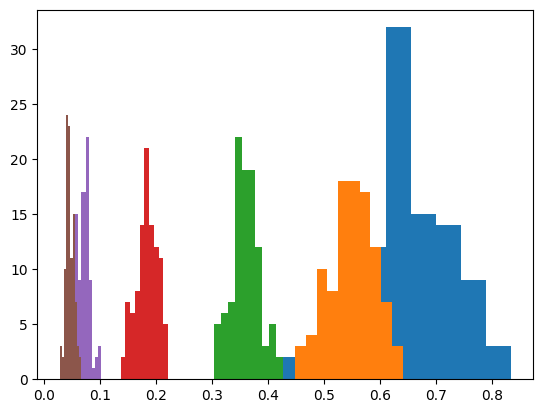

In [85]:
for i in range(6):
    plt.hist(all_MI[i,:])

#### bp 2) and 3)

## Task 2

### a)

In [57]:
def independence_test(X, Y, stats):
    assert stats in ["chi2", "mi"]
    data = np.stack((X,Y),axis=1)
    discx = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    discx.fit(data)
    new_X = discx.transform(data)
    if stats == "chi2":
        chisq = chi2_contingency(pd.crosstab(new_X[:,0],new_X[:,1]))
        return chisq[0], chisq[1]
    else:
        MI = mutual_info_score(new_X[:,0], new_X[:,1])
        return MI, chi2.sf(2*X.shape[0]*MI,81)

MI test p_value: 0.5615908646465737
X^2 test p_value: 0.15712344037313566


### b)

In [73]:
def permutation_test(X, Y, B):
    benchmark = np.zeros(B)
    data = np.stack((X,Y),axis=1)
    discx = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    discx.fit(data)
    new_X = discx.transform(data)
    MI = mutual_info_score(new_X[:,0], new_X[:,1])
    for b in range(B):
        data[:,0] = np.random.permutation(X)
        discx = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
        discx.fit(data)
        new_X = discx.transform(data)
        benchmark[b] = mutual_info_score(new_X[:,0], new_X[:,1])
    return (1 + sum(benchmark >= MI)) / (B + 1)

In [82]:
# Example
n = 1000
ro = 0.04
data = np.random.multivariate_normal(np.zeros(2), np.array([[1, ro], [ro, 1]]), n)
print("Permutation test p_value: "+ str(permutation_test(data[:,0], data[:,1], 1000)))

Permutation test p_value: 0.16283716283716285


### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [83]:
# Example independent
n = 1000
ro = 0
data = np.random.multivariate_normal(np.zeros(2), np.array([[1, ro], [ro, 1]]), n)
print("MI test p_value: "+ str(independence_test(data[:,0], data[:,1], "mi")[1]))
print("X^2 test p_value: "+ str(independence_test(data[:,0], data[:,1], "chi2")[1]))
print("Permutation test p_value: "+ str(permutation_test(data[:,0], data[:,1], 1000)))

MI test p_value: 0.7117305887491367
X^2 test p_value: 0.5307457417717368
Permutation test p_value: 0.45454545454545453


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [90]:
# Example strong dependence
n = 1000
ro = 0.4
data = np.random.multivariate_normal(np.zeros(2), np.array([[1, ro], [ro, 1]]), n)
print("MI test p_value: "+ str(independence_test(data[:,0], data[:,1], "mi")[1]))
print("X^2 test p_value: "+ str(independence_test(data[:,0], data[:,1], "chi2")[1]))
print("Permutation test p_value: "+ str(permutation_test(data[:,0], data[:,1], 1000)))

MI test p_value: 4.717084140359919e-16
X^2 test p_value: 2.8364235641474894e-42
Permutation test p_value: 0.000999000999000999


In [89]:
# Example weak dependence
n = 1000
ro = 0.15
data = np.random.multivariate_normal(np.zeros(2), np.array([[1, ro], [ro, 1]]), n)
print("MI test p_value: "+ str(independence_test(data[:,0], data[:,1], "mi")[1]))
print("X^2 test p_value: "+ str(independence_test(data[:,0], data[:,1], "chi2")[1]))
print("Permutation test p_value: "+ str(permutation_test(data[:,0], data[:,1], 1000)))

MI test p_value: 0.08120172134701166
X^2 test p_value: 0.04940874209485153
Permutation test p_value: 0.029970029970029972
